### 1. Installing dependencies

In [37]:
!pip install gymnasium gym-anytrading pandas matplotlib stable-baselines3[extra] finta

### 2. importing packages

In [38]:
import gymnasium as gym
import gym_anytrading
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os


from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions

from stable_baselines3 import DQN
from stable_baselines3 import A2C
from stable_baselines3 import PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy
from stable_baselines3.common.callbacks import BaseCallback



from gym_anytrading.envs import StocksEnv
from finta import TA






### Constant

In [39]:
WINDOW_SIZE = 14
DATASET_PATH = '/content/Processed_predicted_TSLA (1).csv'


### 3. Read the dataset and preprocess it

In [40]:
df = pd.read_csv(DATASET_PATH)

In [41]:
df['Date'] = pd.to_datetime(df.Date)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,Sentiment,Predicted_Close
0,0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,1,NaN
1,1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,0,NaN
2,2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,0,NaN
3,3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,1,NaN
4,4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,-1,NaN


In [43]:
df.isna().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Unnamed: 0,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Sentiment,0
Predicted_Close,100


In [44]:
df.dropna(inplace=True)

In [45]:
df.isna().sum()

,0
Unnamed: 0,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
Sentiment,0
Predicted_Close,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 100 to 2955
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       2856 non-null   int64         
 1   Date             2856 non-null   datetime64[ns]
 2   Open             2856 non-null   float64       
 3   High             2856 non-null   float64       
 4   Low              2856 non-null   float64       
 5   Close            2856 non-null   float64       
 6   Adj Close        2856 non-null   float64       
 7   Volume           2856 non-null   int64         
 8   Sentiment        2856 non-null   int64         
 9   Predicted_Close  2856 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(3)
memory usage: 245.4 KB


In [47]:
df.set_index('Date', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
df.sort_index(inplace=True)

In [49]:
df.head()

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume,Sentiment,Predicted_Close
Date,,,,,,,,,
2010-11-18,100,6.134,6.148,5.784,5.978,5.978,4780500,0,9.990785
2010-11-19,101,6.032,6.274,5.940,6.198,6.198,5752500,0,9.645310
2010-11-22,102,6.314,6.690,6.300,6.680,6.680,7648500,0,9.681129
2010-11-23,103,6.658,7.136,6.438,6.914,6.914,7889000,0,10.123896
2010-11-24,104,7.054,7.194,6.866,7.094,7.094,7125000,0,10.545571


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2856 entries, 2010-11-18 to 2022-03-24
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2856 non-null   int64  
 1   Open             2856 non-null   float64
 2   High             2856 non-null   float64
 3   Low              2856 non-null   float64
 4   Close            2856 non-null   float64
 5   Adj Close        2856 non-null   float64
 6   Volume           2856 non-null   int64  
 7   Sentiment        2856 non-null   int64  
 8   Predicted_Close  2856 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 223.1 KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
df['SMA'] = TA.SMA(df, WINDOW_SIZE)
df['RSI'] = TA.RSI(df, WINDOW_SIZE)
df['MOM'] = TA.MOM(df, WINDOW_SIZE)
df['OBV'] = TA.OBV(df,'close')
df['EMA'] = TA.EMA(df, WINDOW_SIZE)
df['Stochastic oscillator'] = TA.AO(df,WINDOW_SIZE)
df['AD'] = TA.ADL(df)
df['ROC'] = TA.ROC(df,WINDOW_SIZE)
df.fillna(0, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
df.drop(columns='Unnamed: 0', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
df.head(50)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Adj Close,Volume,Sentiment,Predicted_Close,SMA,RSI,MOM,OBV,EMA,Stochastic oscillator,AD,ROC
Date,,,,,,,,,,,,,,,,
2010-11-18,6.134,6.148,5.784,5.978,5.978,4780500,0,9.990785,0.000000,0.000000,0.000,0.0,5.978000,0.000000,3.151978e+05,0.000000
2010-11-19,6.032,6.274,5.940,6.198,6.198,5752500,0,9.645310,0.000000,100.000000,0.000,5752500.0,6.095857,0.000000,3.449794e+06,0.000000
2010-11-22,6.314,6.690,6.300,6.680,6.680,7648500,0,9.681129,0.000000,100.000000,0.000,13401000.0,6.319002,0.000000,1.070606e+07,0.000000
2010-11-23,6.658,7.136,6.438,6.914,6.914,7889000,0,10.123896,0.000000,100.000000,0.000,21290000.0,6.501028,0.000000,1.357685e+07,0.000000
2010-11-24,7.054,7.194,6.866,7.094,7.094,7125000,0,10.545571,0.000000,100.000000,0.000,28415000.0,6.655734,0.000000,1.635733e+07,0.000000
2010-11-26,7.120,7.200,6.950,7.064,7.064,1753000,0,10.813133,0.000000,96.836734,0.000,26662000.0,6.750199,0.000000,1.620307e+07,0.000000
2010-11-29,7.082,7.190,6.666,6.866,6.866,5728000,0,10.576933,0.000000,79.061031,0.000,20934000.0,6.774601,0.000000,1.484759e+07,0.000000
2010-11-30,6.748,7.066,6.682,7.066,7.066,11113000,0,10.370217,0.000000,82.546215,0.000,32047000.0,6.831594,0.000000,2.596059e+07,0.000000
2010-12-01,7.174,7.284,6.690,6.870,6.870,6496000,0,10.662851,0.000000,70.212458,0.000,25551000.0,6.838666,0.000000,2.340156e+07,0.000000


In [54]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Close'].to_numpy()[start:end]
    diff = np.insert(np.diff(prices), 0, 0)
    signal_features = env.df.loc[:, ['Close','Predicted_Close','Sentiment','SMA', 'RSI', 'MOM', 'OBV', 'EMA', 'Stochastic oscillator', 'AD', 'ROC']].to_numpy()[start:end]
    # Reshape diff to (282, 1)
    diff_reshaped = diff.reshape(len(diff), 1)

    # Concatenate along the second axis (columns)
    signal_features = np.concatenate((signal_features, diff_reshaped), axis=1)


    return prices, signal_features

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq: (int)
    :param log_dir: (str) Path to the folder where the model will be saved.
      It must contains the file created by the ``Monitor`` wrapper.
    :param verbose: (int)
    """

    def __init__(self, check_freq: int, log_dir: str, verbose=1):
        super().__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, "best_model")
        self.best_mean_reward = -np.inf

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:

            # Retrieve training reward
            x, y = ts2xy(load_results(self.log_dir), "timesteps")
            if len(x) > 0:
                # Mean training reward over the last 100 episodes
                mean_reward = np.mean(y[-WINDOW_SIZE:])
                if self.verbose > 0:
                    print(f"Num timesteps: {self.num_timesteps}")
                    print(
                        f"Best mean reward: {self.best_mean_reward:.2f} - Last mean reward per episode: {mean_reward:.2f}"
                    )

                # New best model, you could save the agent here
                if mean_reward > self.best_mean_reward:
                    self.best_mean_reward = mean_reward
                    # Example for saving best model
                    if self.verbose > 0:
                        print(f"Saving new best model to {self.save_path}.zip")
                    self.model.save(self.save_path)

        return True

In [56]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals

    def reset(self, seed=None, options=None):
      super().reset(seed=seed, options=options)
      self.action_space.seed(int((self.np_random.uniform(0, seed if seed is not None else 1))))

      self._truncated = False
      self._current_tick = self._start_tick
      self._last_trade_tick = self._current_tick - 1
      self._position = Positions.Short
      self._position_history = (self.window_size * [None]) + [self._position]
      self._total_reward = 0.
      self._total_profit = 1000.  # unit
      self._first_rendering = True
      self.history = {}

      observation = self._get_observation()
      info = self._get_info()

      if self.render_mode == 'human':
          self._render_frame()

      return observation, info

In [57]:
train_df = df.loc[df.index < '2019-01-01']
test_df = df.loc[df.index >= '2019-01-01']

print('train_df: ',len(train_df))
print('test_df: ',len(test_df))

train_df:  2042
test_df:  814


In [58]:
train_df.shape

(2042, 16)

In [59]:
# Create log dir
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)

In [60]:
env = MyCustomEnv(df=train_df, frame_bound=(WINDOW_SIZE, len(train_df)), window_size=WINDOW_SIZE)

env = Monitor(env, log_dir)

In [61]:
env.signal_features[:1,:]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.signal_features to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.signal_features` for environment variables or `env.get_wrapper_attr('signal_features')` that will search the reminding wrappers.
  logger.warn(


array([[5.97800000e+00, 9.99078546e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.97800000e+00,
        0.00000000e+00, 3.15197802e+05, 0.00000000e+00, 0.00000000e+00]])

In [62]:
env.action_space

Discrete(2)

Discrete: describes a discrete space where {0, 1, …, n-1} are the possible values our observation or action can take. Values can be shifted to {a, a+1, …, a+n-1} using an optional argument.

In [63]:
env.action_space.sample()

0

Sell = 0

Buy = 1

In [64]:
env.observation_space

Box(-10000000000.0, 10000000000.0, (14, 12), float32)

Box: describes an n-dimensional continuous space. It’s a bounded space where we can define the upper and lower limits which describe the valid values our observations can take.



In [65]:
env.observation_space.sample()

array([[-4.0004344e+09, -6.0870154e+09, -1.9946335e+09, -4.1262328e+09,
         6.9241784e+09,  8.3179238e+09,  3.7913810e+09,  5.6075633e+09,
         3.7339843e+09,  4.4287171e+09,  7.9378237e+09,  8.6989933e+08],
       [ 2.5561229e+09, -3.9327777e+09, -5.5972634e+09, -2.5745021e+09,
        -4.8737311e+09, -6.8781453e+08, -6.7413294e+09,  4.2526446e+09,
        -7.5319148e+09, -8.7605064e+09,  6.2346353e+09,  1.6214022e+09],
       [ 6.9132902e+09,  3.5474870e+09, -5.2270848e+09, -2.3087173e+08,
        -6.0021202e+09, -9.4162995e+09,  1.3341811e+09,  5.1548805e+09,
        -3.2978419e+09, -7.4900137e+09,  4.3305923e+09, -9.2402867e+08],
       [-4.1679616e+09,  7.2927652e+09,  2.3796273e+09,  9.6387471e+09,
        -9.5649403e+09, -2.9622013e+09,  7.3529953e+09, -8.1252383e+09,
         2.4853176e+09,  7.2821345e+09,  8.3077709e+09,  2.7130954e+09],
       [-2.1261805e+09, -4.9906253e+09, -7.2797153e+09, -2.7474685e+09,
         1.8890113e+09, -9.3843773e+09,  8.6452000e+08,  9.2

### 4. Create the environment and do some random action on it

info: {'total_reward': 35.21602300000002, 'total_profit': 1.8084458704564477, 'position': <Positions.Short: 0>, 'episode': {'r': 35.216023, 'l': 2027, 't': 0.132695}}


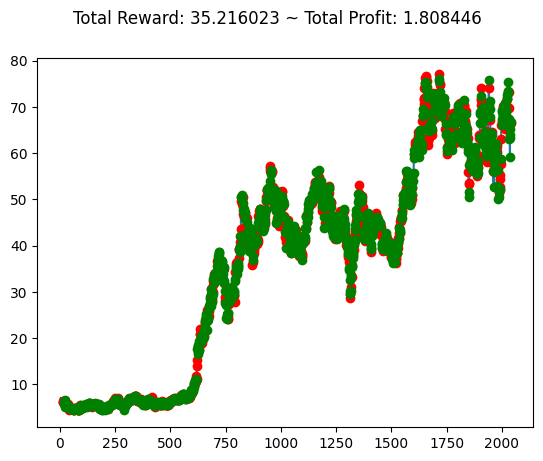

In [66]:

observation = env.reset(seed=2024)
while True:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    # env.render()
    if done:
        print("info:", info)
        break

plt.cla()
env.unwrapped.render_all()
plt.show()

### 5 creating and training the model

In [67]:
model = A2C("MlpPolicy", env, verbose=1)

# Create the callback: check every 2142 steps
callback = SaveOnBestTrainingRewardCallback(check_freq=2142, log_dir=log_dir)

# Train the model
model.learn(total_timesteps=428400,callback=callback)

Streaming output truncated to the last 5000 lines.
|    n_updates          | 56999    |
|    policy_loss        | -0.0023  |
|    value_loss         | 0.00312  |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 2.03e+03 |
|    ep_rew_mean        | 51.9     |
| time/                 |          |
|    fps                | 425      |
|    iterations         | 57100    |
|    time_elapsed       | 671      |
|    total_timesteps    | 285500   |
| train/                |          |
|    entropy_loss       | -0.229   |
|    explained_variance | -2.6     |
|    learning_rate      | 0.0007   |
|    n_updates          | 57099    |
|    policy_loss        | 0.000514 |
|    value_loss         | 0.000261 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 2.03e+03 |
|    ep_rew_mean        | 51.7     |
| time/                 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


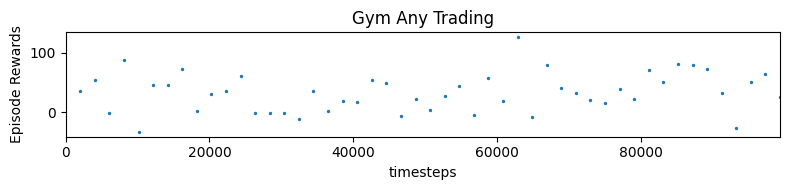

In [68]:
from stable_baselines3.common import results_plotter

# Helper from the library
results_plotter.plot_results(
    [log_dir], 1e5, results_plotter.X_TIMESTEPS, "Gym Any Trading"
)

In [69]:
def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, "valid")


def plot_results(log_folder, title="Learning Curve"):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x, y = ts2xy(load_results(log_folder), "timesteps")
    y = moving_average(y, window=14)
    # Truncate x
    x = x[len(x) - len(y) :]

    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel("Number of Timesteps")
    plt.ylabel("Rewards")
    plt.title(title + " Smoothed")
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


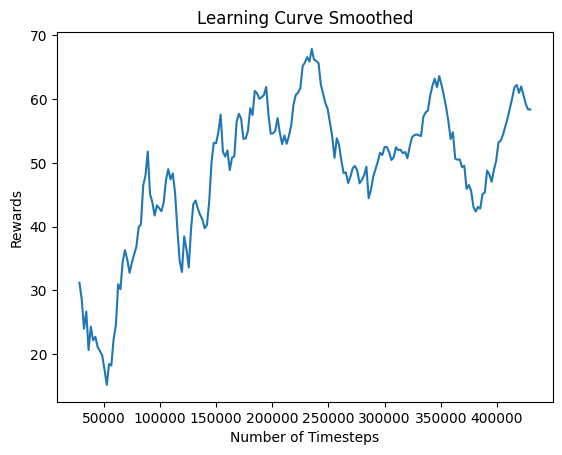

In [70]:
plot_results(log_dir)

### 6. Evaluate the model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


info: {'total_reward': 140.199884, 'total_profit': 1096.4625734671351, 'position': <Positions.Short: 0>}


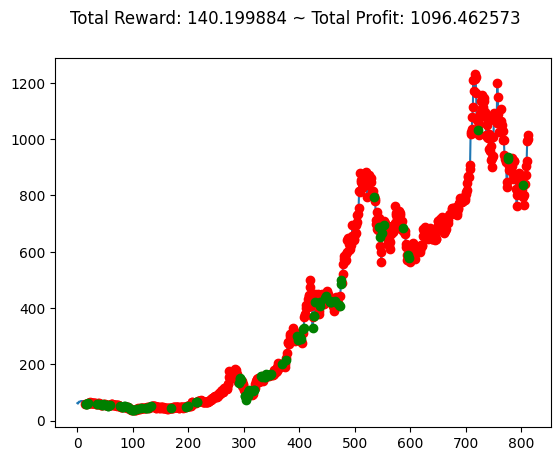

Sharpe Ratio: 4.901004976937944
info: {'total_reward': 133.86391300000003, 'total_profit': 1095.3933781442881, 'position': <Positions.Short: 0>}


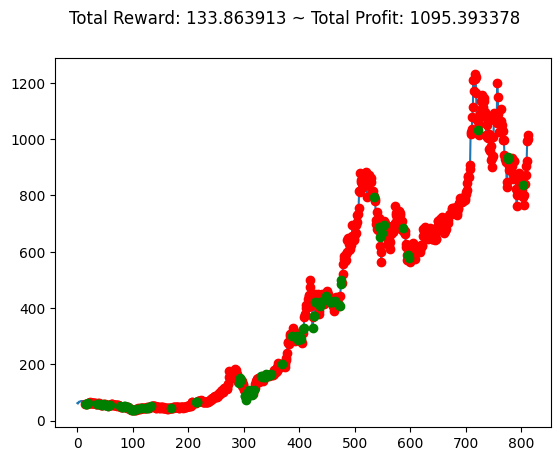

Sharpe Ratio: 4.849640008629496
info: {'total_reward': 143.40588199999996, 'total_profit': 1113.0497213386639, 'position': <Positions.Short: 0>}


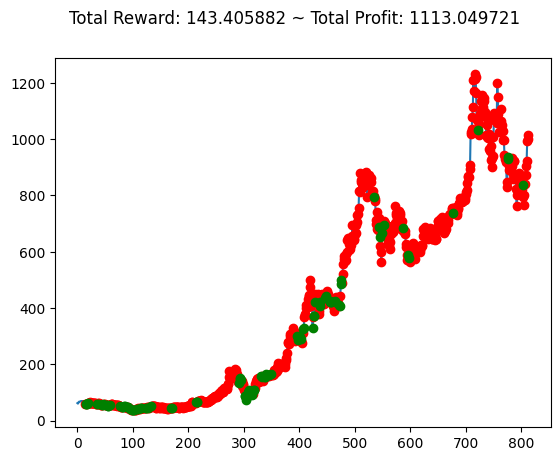

Sharpe Ratio: 4.538962660900282
info: {'total_reward': 127.54591400000004, 'total_profit': 1014.5335899508244, 'position': <Positions.Short: 0>}


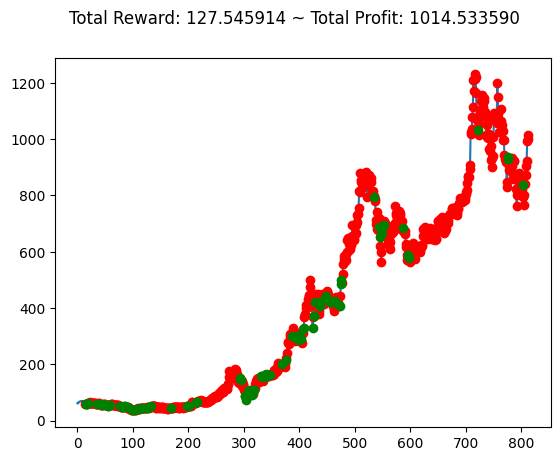

Sharpe Ratio: 6.121283784910928
info: {'total_reward': 179.07796300000007, 'total_profit': 1189.3185226495184, 'position': <Positions.Short: 0>}


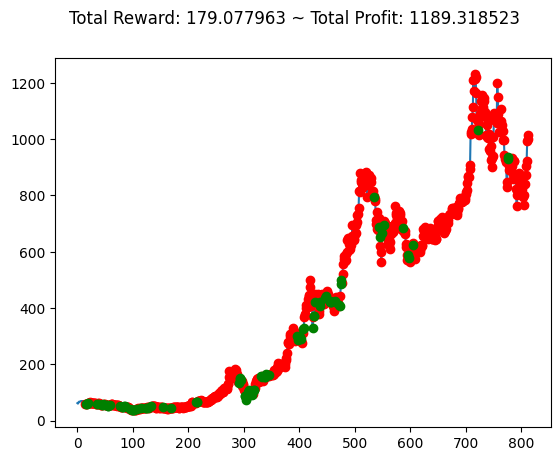

Sharpe Ratio: 4.5115088113784365


In [71]:
total_profit_list = []
total_reward_list = []
total_sharpe_ratio_list = []

for i in range(5):

  env = MyCustomEnv(df=test_df, frame_bound=(WINDOW_SIZE, len(test_df)), window_size=WINDOW_SIZE)

  observation, info = env.reset(seed=2024)
  while True:
      action = model.predict(observation)
      observation, reward, terminated, truncated, info = env.step(action[0])
      done = terminated or truncated

      if done:
          print("info:", info)
          total_profit_list.append(info['total_profit'])
          total_reward_list.append(info['total_reward'])
          break

  plt.cla()
  env.unwrapped.render_all()
  plt.show()

  AWR = env.history['total_profit']

  average_sharpe_ratio = np.mean(AWR) / np.std(AWR)
  print('Sharpe Ratio:', average_sharpe_ratio)
  total_sharpe_ratio_list.append(average_sharpe_ratio)



In [72]:
print('average sharpe ratio: ',np.mean(total_sharpe_ratio_list))
print('average profit: ',np.mean(total_profit_list))

average sharpe ratio:  4.984480048551418
average profit:  1101.751557110086


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
